In [80]:
from graphviz import Digraph

# Scanner  

In [1]:
### create DFA
## remain from char/digit meet other punc
#state12 = dict({x:99 for x in LetterAndDigit.replace('f','')})
import string
LD = string.ascii_lowercase + string.ascii_uppercase + "0123456789"
digits = "0123456789"
chars = string.ascii_lowercase + string.ascii_uppercase
print(LD)
test = "var = 1"
DFADict = {
    #state 0 with
    (0, ' '): 0,
    (0, 'f'): 1,
    (1, 'o'): 2,
    #Other choice from stage 1 will add by state_f
    (2, 'r'): 3, # return for else ?? choice state_for
    #Other choice from stage 2 will add by state_fo
    (0, 'i'): 4,
    #Other choice from stage 4 will add by state_i
    (4, 'f'): 5, #return if
    (0, 'e'): 6,
    #Other choice from stage 6 will add by state_e
    (6, 'l'): 7,
    #Other choice from stage 7 will add by state_el
    (7, 's'): 8,
    #Other choice from stage 8 will add by state_els
    (8, 'e'): 9, #return else
    (0, '('): 10, #return LPAREN
    (0, ')'): 11, #return RPAREN
    (0, '{'): 12, #return LCURLBRAC
    (0, '}'): 13, #return RCURLBRAC
    (0, '['): 14, #return LBRAC
    (0, ']'): 15, #return RBRAC
    (0, ';'): 16, #return semicolon
    (0, '>'): 17, #return GT
    (0, '<'): 18, #return LT
    (0, '='): 19, #return EQ
    (0, '+'): 20, #return add
    (0, '*'): 21, #return mul
    (0, '-'): 22, #22+[0-9]>>23(loop) return digit
    #return var 
    #0+[a-z,A-Z]>>99+[a-z,A-Z,0-9]>>99(loop)
    #return digit
    #0+[0-9]>>23+[0-9]>>23(loop)
}
print(DFADict)
#Choice state_0 to var
state_0v = dict({(0, x):99 for x in chars})
state_0v.pop((0,'f'), None)
state_0v.pop((0,'i'),None)
state_0v.pop((0,'e'),None)
DFADict.update(state_0v)

#state_99 >> +[a-z,A-Z,0-9]
state_99 = dict({(99, x):99 for x in LD})
DFADict.update(state_99)

#Choice state_0 to digits
state_0d = dict({(0, x):23 for x in digits})
DFADict.update(state_0d)
#Choice state_negative to digits
state_neg = dict({(22, x):23 for x in digits})
DFADict.update(state_neg)
#state_23 >> +[0-9]
state_23 = dict({(23, x):23 for x in digits})
DFADict.update(state_23)

#Choice state_f
state_f = dict({(1, x):99 for x in LD})
state_f.pop((1,'o'), None)
DFADict.update(state_f)
#Choice state_fo
state_fo = dict({(2, x):99 for x in LD})
state_fo.pop((2,'r'), None)
DFADict.update(state_fo)

#Choice state_for to var
state_for = dict({(3, x):99 for x in LD})
DFADict.update(state_for)

#Choice state_i
state_i = dict({(4, x):99 for x in LD})
state_i.pop((4,'f'), None)
#print(state_i)
DFADict.update(state_i)
#DFADict.update((4,'f'), 5)

#Choice state_if to var
state_if = dict({(5, x):99 for x in LD})
DFADict.update(state_if)

#Choice state_e
state_e = dict({(6, x):99 for x in LD})
state_e.pop((6,'l'), None)
DFADict.update(state_e)
#Choice state_el
state_el = dict({(7, x):99 for x in LD})
state_el.pop((7,'s'), None)
DFADict.update(state_el)
#Choice state_els
state_els = dict({(8, x):99 for x in LD})
state_els.pop((8,'e'), None)
DFADict.update(state_els)
#Choice state_else to var
state_else = dict({(9, x):99 for x in LD})
DFADict.update(state_else)


abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789
{(0, ' '): 0, (0, 'f'): 1, (1, 'o'): 2, (2, 'r'): 3, (0, 'i'): 4, (4, 'f'): 5, (0, 'e'): 6, (6, 'l'): 7, (7, 's'): 8, (8, 'e'): 9, (0, '('): 10, (0, ')'): 11, (0, '{'): 12, (0, '}'): 13, (0, '['): 14, (0, ']'): 15, (0, ';'): 16, (0, '>'): 17, (0, '<'): 18, (0, '='): 19, (0, '+'): 20, (0, '*'): 21, (0, '-'): 22}
{(0, ' '): 0, (0, 'f'): 1, (1, 'o'): 2, (2, 'r'): 3, (0, 'i'): 4, (4, 'f'): 5, (0, 'e'): 6, (6, 'l'): 7, (7, 's'): 8, (8, 'e'): 9, (0, '('): 10, (0, ')'): 11, (0, '{'): 12, (0, '}'): 13, (0, '['): 14, (0, ']'): 15, (0, ';'): 16, (0, '>'): 17, (0, '<'): 18, (0, '='): 19, (0, '+'): 20, (0, '*'): 21, (0, '-'): 22, (0, 'a'): 99, (0, 'b'): 99, (0, 'c'): 99, (0, 'd'): 99, (0, 'g'): 99, (0, 'h'): 99, (0, 'j'): 99, (0, 'k'): 99, (0, 'l'): 99, (0, 'm'): 99, (0, 'n'): 99, (0, 'o'): 99, (0, 'p'): 99, (0, 'q'): 99, (0, 'r'): 99, (0, 's'): 99, (0, 't'): 99, (0, 'u'): 99, (0, 'v'): 99, (0, 'w'): 99, (0, 'x'): 99, (0, 'y'): 99, (0,

```TEST CASE 
    forex=a[2][3]+b[5]*g+xyz*arr[1][2][3][4][5];
    if(x<5){ k=-3;} else { if(j<3) else {m=3;}}
    if(x<5){if(j<3){m=3;}else{k=3;}} else{k=4;}
    for(k=3;j<4;k=k+1;){if(j<3){k=4;}else{m=5;}}
```

In [221]:
#use
#Test Scanner
test = "if(x<5){x=5;} else{k=4;}"
pointer = 0
curState = 0
streamOfToken = [[]]
numToken = 0
lookahead = 1
word = ''
text = test + '$'
symbol = ''
print(test)
text
while pointer < len(text) and text[pointer] != '$':
    symbol = text[pointer]
    if symbol == ' ' :
        curState = 0
        pointer = pointer+1
        lookahead = lookahead+1
    elif (curState,symbol) not in DFADict:
        curState = 0
    else:
        nextstate_sym = DFADict[(curState,symbol)]
        curState = nextstate_sym
        pointer = pointer+1
        word = word+symbol
        if (nextstate_sym,text[lookahead]) not in DFADict:
            streamOfToken[numToken].append(word)
            streamOfToken[numToken].append(nextstate_sym)
            if(text[lookahead]!='$'):
                streamOfToken.append([])
            numToken+=1
            word=''
        lookahead = lookahead+1
finalStateDict = {3:"for" ,5:"if" ,9:"else" ,10:"(",11:")",12:"{",13:"}",14:"[",15:"]",16:";",17:">",18:"<",19:"=",20:"+",21:"*",23:"num",99:"var"}
for x in streamOfToken:
    x[1] = finalStateDict[x[1]]
print(streamOfToken)

if(x<5){x=5;} else{k=4;}
[['if', 'if'], ['(', '('], ['x', 'var'], ['<', '<'], ['5', 'num'], [')', ')'], ['{', '{'], ['x', 'var'], ['=', '='], ['5', 'num'], [';', ';'], ['}', '}'], ['else', 'else'], ['{', '{'], ['k', 'var'], ['=', '='], ['4', 'num'], [';', ';'], ['}', '}']]


In [222]:
#preprocess streamOfToken
in_token = []
for eachToken in streamOfToken:
    in_token.append(eachToken[1])
in_token.append('$')

In [223]:
in_token

['if',
 '(',
 'var',
 '<',
 'num',
 ')',
 '{',
 'var',
 '=',
 'num',
 ';',
 '}',
 'else',
 '{',
 'var',
 '=',
 'num',
 ';',
 '}',
 '$']

In [228]:
stack= []
graph= []
tree = []
i=1
con = 0
tree.append('S(0)')
startNode = Node('S')
dot = Digraph(comment='Graph')
stack.append('$')
stack.append('S')
current = 0
sepDup = 0
while len(stack) > 0 and len(in_token) > 0:
    x = stack.pop()
    a = in_token[current]
    print("x:",x,"a:",a,"i:",i)
    if a=='$' and x=='$':
        print(stack)
        print('ACCEPT')
        break
    elif T.count(x)>0 or x=='$':
        if x==a:
            current = current + 1
            #print('step')
        else:
            raise Exception('Abort')
    else: # x is non-terminal
        try:
            print("production:",production[ParsingTable[x][a]])
            tempToPush = list(production[ParsingTable[x][a]].values())[0]
        except:
            print('Abort')
        tempgraph=[]
        tempToken = reversed(tempToPush)
        """if g[last][0] != 'lambda':
                    for s in  reversed(g[last]):
                        stack.append(s)
                    
                    for a in g[last]:
                        
                        for j in tree:
                            if last+'(' in j:
                                parent = j
                        dot.edge(parent,a+'('+str(i)+')',constraint='true')
                        
                        tree.append(a+'('+str(i)+')')
                        i=i+1"""
        for token in tempToken:
            if token != 'empty':
                stack.append(token)
        for token in tempToPush:
            #if token != 'empty':
            for j in tree:
                if x+'(' in j:
                    parent = j
            dot.edge(parent,token+'('+str(i)+')',constraint='true')
            print("parent: ",parent,"child: ",token+'('+str(i)+')')
            tree.append(token+'('+str(i)+')')
            i=i+1
        
            

                
    dot.render('graph'+str(con)+'.gv',view=True)  
    con=con+1
    print(stack)
    print(current)
    print('--//--')
        
       
    
    



x: S a: if i: 1
production: {'S': ['ST', 'S']}
parent:  S(0) child:  ST(1)
parent:  S(0) child:  S(2)
['$', 'S', 'ST']
0
--//--
x: ST a: if i: 3
production: {'ST': ['ifST']}
parent:  ST(1) child:  ifST(3)
['$', 'S', 'ifST']
0
--//--
x: ifST a: if i: 4
production: {'ifST': ['if', '(', 'rlEXP', ')', 'block', 'else', 'block']}
parent:  ifST(3) child:  if(4)
parent:  ifST(3) child:  ((5)
parent:  ifST(3) child:  rlEXP(6)
parent:  ifST(3) child:  )(7)
parent:  ifST(3) child:  block(8)
parent:  ifST(3) child:  else(9)
parent:  ifST(3) child:  block(10)
['$', 'S', 'block', 'else', 'block', ')', 'rlEXP', '(', 'if']
0
--//--
x: if a: if i: 11
['$', 'S', 'block', 'else', 'block', ')', 'rlEXP', '(']
1
--//--
x: ( a: ( i: 11
['$', 'S', 'block', 'else', 'block', ')', 'rlEXP']
2
--//--
x: rlEXP a: var i: 11
production: {'rlEXP': ['rlEXP2', "rlEXP'"]}
parent:  rlEXP(6) child:  rlEXP2(11)
parent:  rlEXP(6) child:  rlEXP'(12)
['$', 'S', 'block', 'else', 'block', ')', "rlEXP'", 'rlEXP2']
2
--//--
x: rlE

In [153]:
stack = []
#set of terminals
T = ["var","[","]","{","}","=",";","if","(",")","else","for","<",">","+","*","num"] 
#set of non-terminals
N = ['S','ST','var','array','const','block','aST','aST2','ifST','forST','rlEXP',"rlEXP'",'rlEXP2','OP','arEXP',"arEXP'",'term',"term'","factor"] 

In [220]:
production = {
    1: {'S':['ST','S']},
    2: {'S':['empty']},
    3: {'ST':['aST']},
    4: {'ST':['ifST']},
    5: {'ST':['forST']},
    6: {'ST':['block']},
    7: {'va':['var','array']},
    8: {'array':['empty']},
    9: {'array':['[','arEXP',']','array']},
    10: {'block':['{','S','}']},
    11: {'aST':['va','=','arEXP',';']},
    12: {'aST2':['va','=','arEXP']},
    13: {'ifST':['if','(','rlEXP',')','block','else','block']},
    14: {'forST':['for','(','aST2',';','rlEXP',';','aST2',')','block']},
    15: {'rlEXP':['rlEXP2',"rlEXP'"]},
    16: {"rlEXP'":['OP','rlEXP2']},
    17: {"rlEXP'":['(','rlEXP',')']},
    18: {'rlEXP2':['(','rlEXP',')']},
    19: {'rlEXP2':['arEXP']},
    20: {'OP':['<']},
    21: {'OP':['>']},
    22: {'arEXP':['term',"arEXP'"]},
    23: {"arEXP'":['+','term',"arEXP'"]},
    24: {"arEXP'":['empty']},
    25: {'term':['factor',"term'"]},
    26: {"term'":['*','factor',"term'"]},
    27: {"term'":['empty']},
    28: {'factor':['(','arEXP',')']},
    29: {'factor':['num']},
    30: {'factor':['va']}
}

In [219]:
ParsingTable = {
    'S':{ 'var':1, '{':1,'}':2, 'if':1, 'for':1,'$':2 },
    'ST':{'var':3, '{':6, 'if':4, 'for':5 },
    'va':{ 'var':7 },
    'array':{'[':9,']':8,'=':8,';':8,'(':8,')':8,'<':8,'>':8,'+':8,'*':8 },
    'block':{'{':10 },
    'aST':{'var':11},
    'aST2':{'var':12},
    'ifST':{'if':13},
    'forST':{'for':14},
    'rlEXP':{'var':15,'(':15,'num':15},
    "rlEXP'":{'(':17,'<':16,'>':16},
    'rlEXP2':{'var':19,'(':19,'num':19},
    'OP':{'<':20,'>':21},
    'arEXP':{'var':22,'(':22,'num':22},
    "arEXP'":{']':24,';':24,'(':24,')':24,'<':24,'>':24,'+':23,},
    'term':{'var':25,'(':25,'num':25
    },
    "term'":{
        ']':27,
        ';':27,
        '(':27,
        ')':27,
        '<':27,
        '>':27,
        '+':27,
        '*':26
    },
    "factor":{
        'var':30,
        '(':28,
        'num':29
    }
}

In [215]:
dot.render('graph1.gv',view=True)

'graph1.gv.pdf'

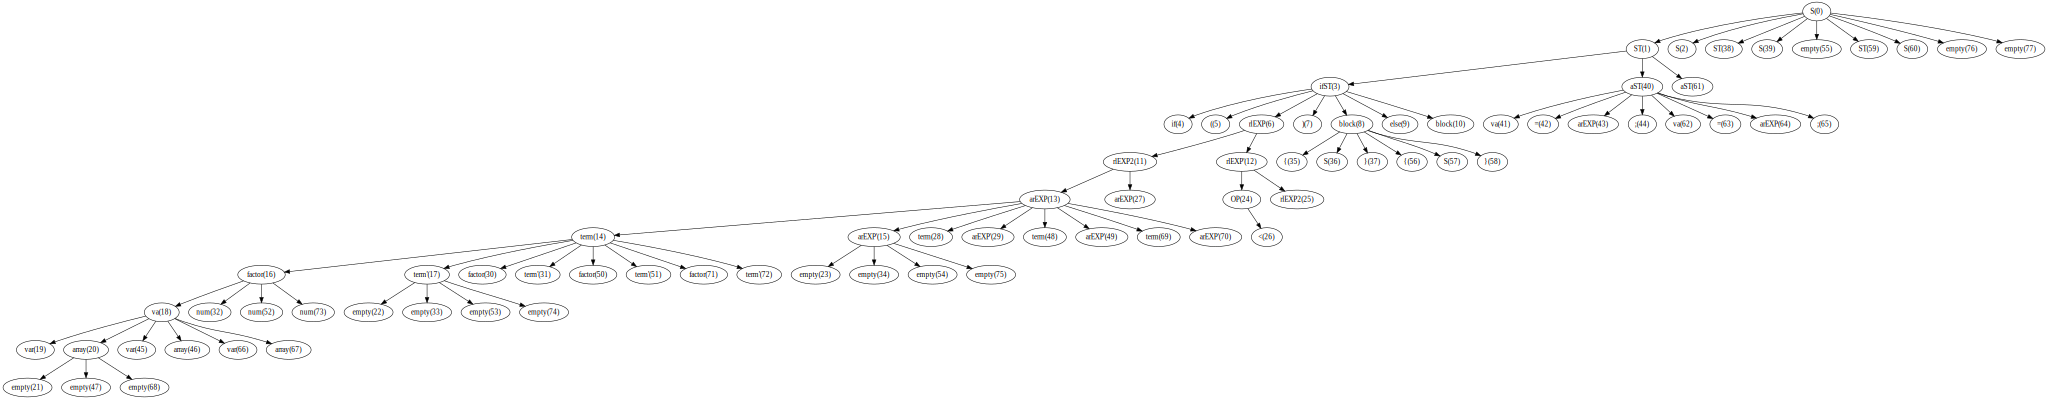

In [229]:
dot

In [209]:
class Node(object):
    def __init__(self, id_):
        self.id = id_
        self.children = []
        
    def __repr__(self):
        return "Node: [%s]" % self.id
    
    def add_child(self, node):
        self.children.append(node) 
    
    def get_children(self):
        return self.children         
    
    def get_rev_children(self):
        children = self.children[:]
        children.reverse()
        return children         


In [ ]:
number = 0

for number in range(10):
    number = number + 1

    if number == 5:
        break    # break here

    print('Number is ' + str(number))
    

print('Out of loop')